In [1]:
# %load_ext tensorboard

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

import torchvision
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from timeit import default_timer

from genotype.genotype import RandomArchitectureGenerator

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter()

In [18]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# get the class labels for each image
class_labels = [trainset.classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

NameError: name 'trainset' is not defined

In [19]:
# helper functions

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels, classes):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    fig.tight_layout()
    return fig

In [20]:
rag = RandomArchitectureGenerator(prediction_classes=10, min_depth=5, max_depth=7, image_size=28, input_channels=1, min_nodes=5)

In [23]:
g, a = rag.get_architecture()

Final depth:4
Number of nodes:8


In [22]:
rag.reset()

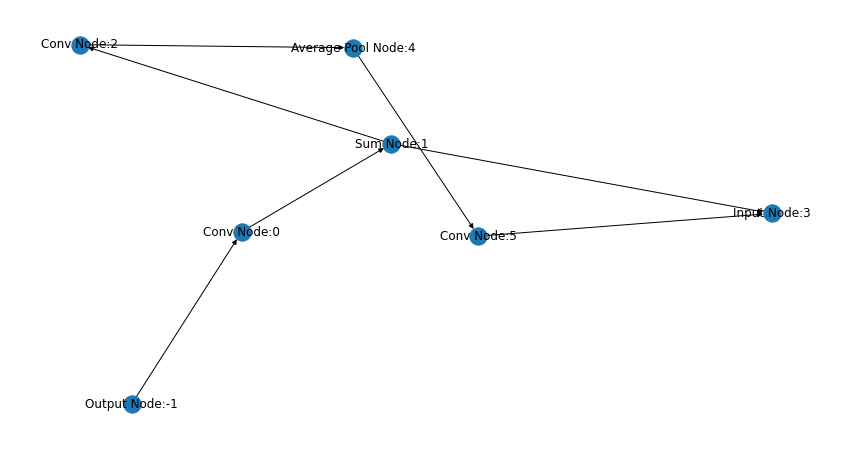

In [24]:
rag.show()

In [26]:
rag(torch.rand(1, 1, 28, 28))

General: 
    ID: -1
    Initialised: True
    Type: Output Node
Input Info: 
    Channels: None
    Height: None
    Width: None
Output Info: 
    Channels: None
    Height: None
    Width: None
Connectivity: 
    Successors ID: [0]
    Predecessors ID: []
    Inputs: 1


tensor([[[[-0.1719, -0.1719, -0.1719,  ..., -0.1719, -0.1719, -0.1719],
          [-0.1719, -0.1719, -0.1719,  ..., -0.1719, -0.1719, -0.1719],
          [-0.1719, -0.1719, -0.1719,  ..., -0.1719, -0.1719, -0.1719],
          ...,
          [-0.1719, -0.1719,  5.7176,  ..., -0.1719, -0.1719, -0.1719],
          [-0.1719, -0.1719, -0.1719,  ..., -0.1719, -0.1719, -0.1719],
          [ 8.4426, -0.1719, -0.1719,  ..., -0.1719, -0.1719, -0.1719]],

         [[-0.2775, -0.5140, -1.1060,  ..., -1.1113, -0.7065, -0.5583],
          [-0.1096, -0.2353,  1.0339,  ..., -1.3482,  0.8361,  0.1618],
          [-0.0780, -0.8959, -0.5693,  ...,  0.4109, -1.4696, -1.3580],
          ...,
          [ 0.7220,  0.4676,  1.9023,  ..., -0.2705, -1.8504, -1.4240],
          [-0.9033, -0.8166,  1.1462,  ...,  0.3828,  0.4321,  1.2246],
          [ 1.6548,  1.0959, -0.0449,  ...,  1.8719,  1.1593,  0.9903]],

         [[ 1.0893, -0.2247,  3.2175,  ..., -0.5930, -0.8991, -0.8991],
          [-0.8991, -0.3364, -

In [27]:
list(rag._module_dict.parameters())

[Parameter containing:
 tensor([[[[-0.1998, -0.1177, -0.1157, -0.1537, -0.0643],
           [ 0.1874, -0.1359, -0.0674, -0.1517,  0.0731],
           [ 0.0101, -0.1831, -0.1043, -0.0391, -0.0783],
           [ 0.1539, -0.1817,  0.0885,  0.1603,  0.0035],
           [ 0.0387, -0.0685,  0.1224,  0.1147,  0.1950]]],
 
 
         [[[ 0.0519, -0.0605,  0.1401, -0.1032, -0.1253],
           [ 0.0024, -0.0285,  0.0489, -0.0177,  0.0306],
           [-0.0933, -0.1616,  0.0079, -0.0543,  0.0525],
           [ 0.1480,  0.0907, -0.1045, -0.0952,  0.1257],
           [-0.0617, -0.0132,  0.1081,  0.0774,  0.1609]]],
 
 
         [[[-0.1172, -0.1060, -0.1517,  0.0431,  0.1156],
           [ 0.0212,  0.0510,  0.0218, -0.0249,  0.0081],
           [ 0.0156, -0.0741, -0.0900,  0.1152, -0.1149],
           [-0.1082, -0.0649, -0.0414, -0.0815, -0.0604],
           [ 0.1801,  0.1604, -0.0380,  0.0715,  0.0618]]],
 
 
         ...,
 
 
         [[[-0.0410,  0.1767, -0.0545, -0.1429, -0.0318],
           [ 

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
testset = datasets.MNIST('mnist_test', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


images, labels = next(iter(trainloader))

grid = torchvision.utils.make_grid(images)

writer.add_image('images', grid, 0)
writer.add_graph(my_nn, images)
writer.close()

NameError: name 'my_nn' is not defined

In [15]:
list(rag._module_dict.parameters())

[]

In [7]:
pytorch_total_params = sum(p.numel() for p in rag.parameters())
pytorch_total_params

0

In [8]:
a[3]._parameters

OrderedDict()

In [9]:
list(network.parameters())

[]

In [10]:
num_epochs = 2
writer = SummaryWriter()
running_loss = 0.0
my_nn = rag
my_nn.to(device)
optimizer = optim.Adam(my_nn.parameters(), lr=0.001,)   
criterion = nn.CrossEntropyLoss()

milestones = [k for k in range(0, num_epochs*len(trainloader), 50)]

scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.95)

start_t = default_timer()

batch_tt = np.empty(shape=(10,))
k=0
for epoch in range(num_epochs-1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        batch_st = default_timer() 
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = [d.to(device) for d in data]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = my_nn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        scheduler.step()

        running_loss += loss.item()
        
        batch_et = default_timer()
        
        batch_tt[k] = batch_et - batch_st
        
        k+=1
        
        if i % 10 == 9:    # every 10 batches...
            
            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 10,
                            epoch * len(trainloader) + i)
            writer.add_scalar('Learning rate',+
                            optimizer.param_groups[0]['lr'],
                            epoch * len(trainloader) + i)
            writer.add_scalar('Average batch time',
                            np.mean(batch_tt).item(),
                            epoch * len(trainloader) + i)
            
            running_loss = 0.0
            batch_tt = np.empty(shape=(10,))
            k=0
        


end_t = default_timer()

total_t = end_t - start_t

writer.add_scalar('Total training time',
                   total_t,
                epoch * len(trainloader) + i)

        

ValueError: optimizer got an empty parameter list

In [11]:
test_md = nn.ModuleDict()

In [12]:
test_md

ModuleDict()